<a id=top-page></a>
# `pykitPIV` demo: Image statistics

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#synthetic-images">Generate particles</a></li>
    <li><a href="#predict">Explore image statistics</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
from pykitPIV import Particle, Image

In [2]:
n_images = 1
image_size = (128,256)
size_buffer = 10
figsize = (6,3)

***

## Generate particles

In [3]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(3,3.1),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     signal_to_noise=(5,20),
                     diameter_std=0.2,
                     seeding_mode='random', 
                     random_seed=100)

In [4]:
image = Image(random_seed=100)

In [5]:
image.add_particles(particles)

Particles added to the image.


***

## Explore image statistics

### Statistics of low-exposure images

In [6]:
exposures = (0.1, 0.15)

In [7]:
image.add_reflected_light(exposures=exposures,
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.


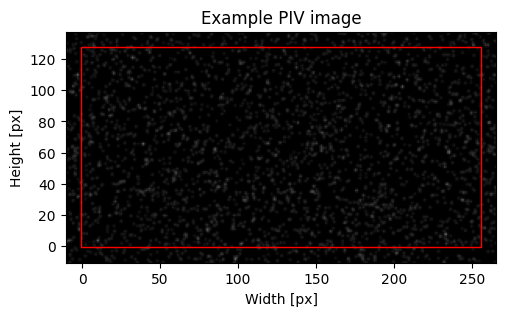

In [8]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-low-exposure.png');

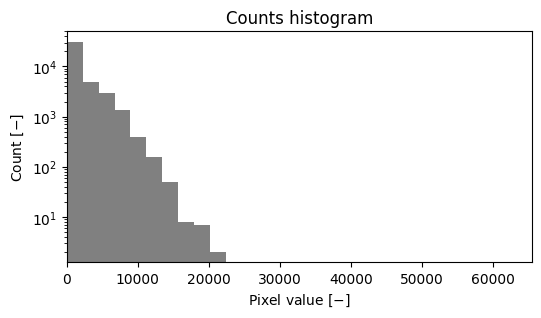

In [9]:
image.plot_image_histogram(image.images_I1[0], 
                           logscale=True,
                           color='grey',
                           xlabel='Pixel value [$-$]',
                           ylabel='Count [$-$]',
                           title='Counts histogram',
                           figsize=figsize,
                           filename='counts-histogram-low-exposure.png');

### Statistics of high-exposure images

In [10]:
exposures = (0.9, 0.95)

In [11]:
image.add_reflected_light(exposures=exposures,
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.


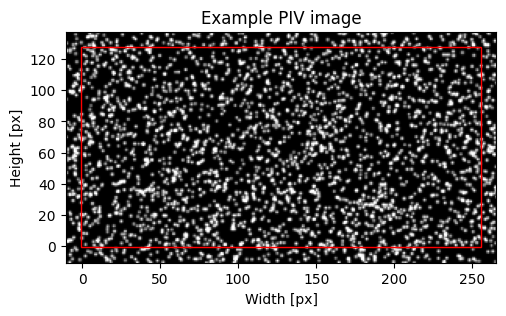

In [12]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-high-exposure.png');

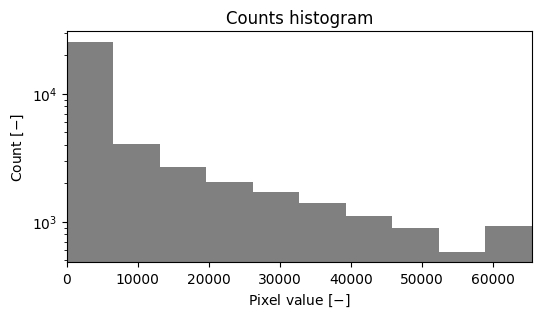

In [13]:
image.plot_image_histogram(image.images_I1[0], 
                           logscale=True,
                           color='grey',
                           xlabel='Pixel value [$-$]',
                           ylabel='Count [$-$]',
                           title='Counts histogram',
                           figsize=figsize,
                           filename='counts-histogram-high-exposure.png');

In [14]:
# counts_dictionary = image.measure_counts(image.images_I1[0])

***